# River discharge

In this tutorial we will simulate a fictitious radioactive tracer that is injected into the ocean by the 200 largest rivers (by estimated discharge).
The 200 major rivers dataset from [*Dai and Trenberth* (2002)](https://rda.ucar.edu/datasets/ds551.0/) is available from within the AIBECS.
Once "born", our ficitious tracer decays with a parameter timescale $\tau$ as it flows through ocean basins.

The 3D tracer equation is:

$$\left[\frac{\partial}{\partial t} + \nabla \cdot (\boldsymbol{u} + \mathbf{K}\nabla)\right] x = s_\mathsf{rivers} - x / \tau$$

where $\nabla \cdot \left[ \boldsymbol{u} - \mathbf{K} \nabla \right]$ represents the ocean circulation transport.
(Tracer transport operators are described in the documentation.)
The riverine source of the tracer is $s_\mathsf{rivers}$, and $x / \tau$ is the decay rate.

In AIBECS, we must recast this equation in the generic form

$$\left[\frac{\partial}{\partial t} + \mathbf{T}(\boldsymbol{p})\right] \boldsymbol{x} = \boldsymbol{G}(\boldsymbol{x},\boldsymbol{p}).$$

We start by telling Julia that we want to use the AIBECS and the OCIM2 transport matrix for the ocean circulation.

In [1]:
using AIBECS
grd, T_OCIM2 = OCIM2.load()

┌ Warning: Over-writing registration of the datadep
│   name = AIBECS-OCIM2_CTL_He
└ @ DataDeps /Users/runner/.julia/packages/DataDeps/gbyoa/src/registration.jl:15
┌ Info: You are about to use the OCIM2_CTL_He model.
│ If you use it for research, please cite:
│ 
│ - DeVries, T., & Holzer, M. (2019). Radiocarbon and helium isotope constraints on deep ocean ventilation and mantle‐³He sources. Journal of Geophysical Research: Oceans, 124, 3036–3057. https://doi.org/10.1029/2018JC014716
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Holzer_2019" key.)
└ @ AIBECS.OCIM2 /Users/runner/work/AIBECS.jl/AIBECS.jl/src/OCIM2.jl:113


(, 
  [1     ,      1]  =  0.000197784
  [2     ,      1]  =  2.34279e-9
  [10384 ,      1]  =  -1.95995e-7
  [10442 ,      1]  =  -0.000191612
  [10443 ,      1]  =  4.80961e-9
  [20825 ,      1]  =  -1.83059e-9
  [20883 ,      1]  =  5.00768e-9
  [1     ,      2]  =  -5.02516e-8
  [2     ,      2]  =  0.000187531
  ⋮
  [200160, 200159]  =  -2.19656e-8
  [197886, 200160]  =  1.08199e-10
  [199766, 200160]  =  6.70981e-9
  [199777, 200160]  =  -1.26352e-9
  [199778, 200160]  =  -3.39279e-9
  [199779, 200160]  =  7.59316e-9
  [199790, 200160]  =  -7.41018e-9
  [200156, 200160]  =  -3.44106e-8
  [200159, 200160]  =  -2.00303e-8
  [200160, 200160]  =  5.27945e-8, Quantity{Float64,𝐍 𝐋⁻³ 𝐓⁻¹,Unitful.FreeUnits{(m⁻³, mol, yr⁻¹),𝐍 𝐋⁻³ 𝐓⁻¹,nothing}}[1.82368935574118e-11 mol m⁻³ yr⁻¹, 1.9469772194929453e-11 mol m⁻³ yr⁻¹, 3.4879359939844136e-13 mol m⁻³ yr⁻¹, 1.5360041759458074e-12 mol m⁻³ yr⁻¹, 1.47673234957578e-12 mol m⁻³ yr⁻¹, 5.300237184679614e-11 mol m⁻³ yr⁻¹, 8.595855761423191e-11 mol m⁻³ yr

The transport is

In [2]:
T_radiorivers(p) = T_OCIM2

T_radiorivers (generic function with 1 method)

For the radioactive decay, we simply use

In [3]:
function decay(x, p)
    @unpack τ = p
    return x / τ
end

decay (generic function with 1 method)

To build the river sources, we will load the geographic locations and discharge (in m³ s⁻¹) from the [*Dai and Trenberth* (2017) dataset](https://rda.ucar.edu/datasets/ds551.0/index.html#!description).

In [4]:
RIVERS = Rivers.load()

┌ Info: You are about to use the Dai and Trenberth river discharge dataset.
│ If you use it for research, please cite:
│ 
│ - For the dataset itself: Dai, A. 2017. Dai and Trenberth Global River Flow and Continental Discharge Dataset. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. https://doi.org/10.5065/D6V69H1T.
│ - For the formal publication that describe the dataset: Dai, A., and K. E. Trenberth, 2002: Estimates of freshwater discharge from continents: Latitudinal and seasonal variations. J. Hydrometeorol., 3, 660–687.
│ - For descriptions of updates to the dataset:
│     - Dai, A., T. Qian, K. E. Trenberth, and J. D Milliman, 2009: Changes in continental freshwater discharge from 1948-2004. J. Climate, 22, 2773–2791.
│     - Dai, A., 2016: Historical and future changes in streamflow and continental runoff: A review, in Terrestrial Water Cycle and Climate Change: Natural and Human-Induced Impacts, Geophysical

200-element Array{AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}},1}:
 Amazon (-2.0, -55.5) 210472 m³ s⁻¹
 Congo (-4.3, 15.3) 41448 m³ s⁻¹
 Orinoco (8.1, -63.6) 35776 m³ s⁻¹
 Changjiang (30.8, 117.6) 29914 m³ s⁻¹
 Brahmaputra (25.2, 89.7) 19900 m³ s⁻¹
 Mississippi (32.3, -90.9) 19330 m³ s⁻¹
 Yenisey (67.4, 86.5) 18981 m³ s⁻¹
 Paraná (-32.7, -60.7) 17999 m³ s⁻¹
 Lena (70.7, 127.4) 16826 m³ s⁻¹
 Mekong (15.1, 105.8) 16636 m³ s⁻¹
 ⋮
 Guadalquivir (37.5, -6.0) 105 m³ s⁻¹
 Yaqui (29.2, -109.5) 105 m³ s⁻¹
 Colorado-TX (29.3, -96.1) 82 m³ s⁻¹
 Rio Grande (25.9, -97.4) 48 m³ s⁻¹
 de Grey (-20.3, 119.2) 44 m³ s⁻¹
 Gascoyne (-24.8, 113.8) 22 m³ s⁻¹
 Avon (-31.8, 116.1) 22 m³ s⁻¹
 Fortescue (-21.3, 116.2) 10 m³ s⁻¹
 Murchison (-27.9, 114.5) 6 m³ s⁻¹

This is an array of rivers, for which the type `River{T}` contains the river's name, lat–lon coordinates, and discharge in m³ s⁻¹.
For example, the first river is the Amazon

In [5]:
r = RIVERS[1]

Amazon (-2.0, -55.5) 210472 m³ s⁻¹

We can check the locations with

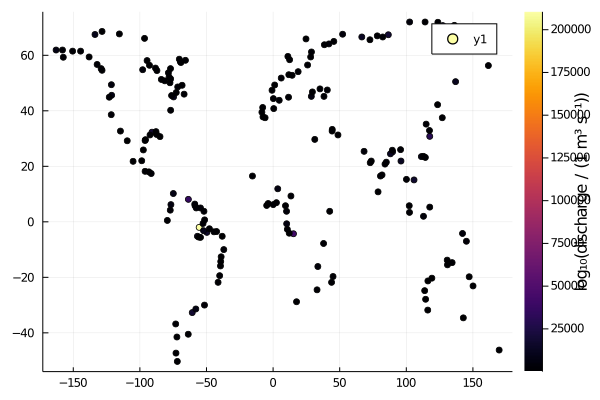

In [6]:
using Plots
scatter([r.lon for r in RIVERS], [r.lat for r in RIVERS],
        zcolor=ustrip.([r.VFR for r in RIVERS] / u"m^3/s"),
        colorbartitle="log₁₀(discharge / (1 m³ s⁻¹))")

We can regrid these into the OCIM2 grid and return the corresponding vector with

In [7]:
rivers = regrid(RIVERS, grd)

200160-element Array{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}},1}:
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
          ⋮
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹

(Note this regridding uses [NearestNeighbors.jl](https://github.com/KristofferC/NearestNeighbors.jl) to assign a wet box as the mouth of each river, which sometimes is not exactly the real location of the river mouth.)

We control the global magnitude of the river discharge, $\sigma$ (in mol s⁻¹), by making it a parameter of our model.
For that, we separate the river source

$$s_\mathsf{rivers} = \sigma s_0$$

into global magnitude ($\sigma$) and spatial pattern ($s_0$).

Since $\int s_0 \mathrm{d}V = 1$, `s_0` can be computed by normalizing `rivers`.
In Julia/AIBECS, this can be done by dividing `rivers` by the dot product `v ⋅ rivers` (or `v'rivers` in matrix form).
(`v ⋅ x` is the discrete equivalent of the volume integral $\int x \mathrm{d}V$.)

In [8]:
v = vector_of_volumes(grd)
s_0 = rivers / (v'rivers)
function s_rivers(p)
    @unpack σ = p
    return σ * ustrip.(s_0) # we must remove the units in AIBECS here :(
end

s_rivers (generic function with 1 method)

We then write the generic $\boldsymbol{G}$ function, which is

In [9]:
G_radiorivers(x,p) = s_rivers(p) - decay(x,p)

G_radiorivers (generic function with 1 method)

##### Parameters

We specify some initial values for the parameters and also include units.

In [10]:
import AIBECS: @units, units
import AIBECS: @initial_value, initial_value
@initial_value @units struct RadioRiversParameters{U} <: AbstractParameters{U}
    τ::U | 5.0 | u"yr"
    σ::U | 1.0 | u"Gmol/yr"
end

initial_value (generic function with 29 methods)

Finally, thanks to the initial values we provided, we can instantiate the parameter vector succinctly as

In [11]:
p = RadioRiversParameters()


│ Row │ Symbol │ Value   │ Initial value │ Unit      │
│     │ Symbol │ Float64 │ Float64       │ FreeUnit… │
├─────┼────────┼─────────┼───────────────┼───────────┤
│ 1   │ τ      │ 5.0     │ 5.0           │ yr        │
│ 2   │ σ      │ 1.0     │ 1.0           │ Gmol yr⁻¹ │

We generate the state function `F` and its Jacobian `∇ₓF`,

In [12]:
F, ∇ₓF = state_function_and_Jacobian(T_radiorivers, G_radiorivers)

(AIBECS.var"#F#97"{typeof(Main.##320.T_radiorivers),typeof(Main.##320.G_radiorivers)}(Main.##320.T_radiorivers, Main.##320.G_radiorivers), AIBECS.var"#∇ₓF#99"{typeof(Main.##320.T_radiorivers),AIBECS.var"#∇ₓG#98"{typeof(Main.##320.G_radiorivers)}}(Main.##320.T_radiorivers, AIBECS.var"#∇ₓG#98"{typeof(Main.##320.G_radiorivers)}(Main.##320.G_radiorivers)))

generate the steady-state problem `prob`,

In [13]:
nb = sum(iswet(grd))
x = ones(nb) # initial guess
prob = SteadyStateProblem(F, ∇ₓF, x, p)

SteadyStateProblem with uType Array{Float64,1}
u0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

and solve it

In [14]:
s = solve(prob, CTKAlg()).u * u"mol/m^3"

200160-element Array{Quantity{Float64,𝐍 𝐋⁻³,Unitful.FreeUnits{(m⁻³, mol),𝐍 𝐋⁻³,nothing}},1}:
 -3.5978320678557204e-12 mol m⁻³
  -5.353871365616958e-12 mol m⁻³
  -6.483485194148308e-12 mol m⁻³
  -7.823908119440946e-12 mol m⁻³
   -9.79044237114688e-12 mol m⁻³
  -9.770934123559535e-12 mol m⁻³
 -2.4448173185337425e-11 mol m⁻³
  -6.738392003834789e-11 mol m⁻³
  -6.510837450821769e-11 mol m⁻³
  -7.890402312092349e-11 mol m⁻³
                               ⋮
 -3.8760741626619425e-13 mol m⁻³
 -1.3409356343223694e-13 mol m⁻³
  -7.257906578905425e-13 mol m⁻³
  -6.182255119626912e-13 mol m⁻³
  -3.400187261169315e-13 mol m⁻³
   6.192396794418934e-13 mol m⁻³
  -5.257895087043799e-13 mol m⁻³
  -6.838780987222966e-13 mol m⁻³
  -4.278816669049978e-13 mol m⁻³

Let's now run some visualizations using the plot recipes.
Taking a horizontal slice of the 3D field at 200m gives

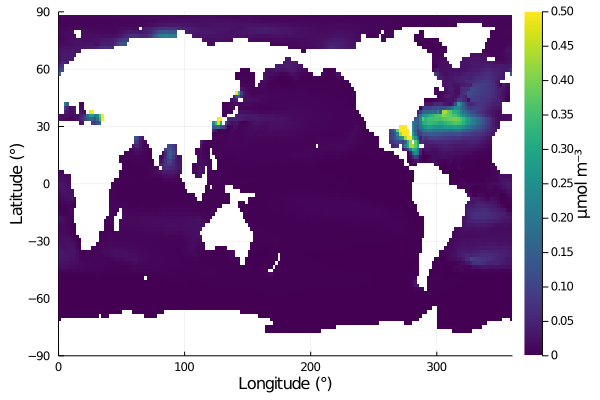

In [15]:
cmap = :viridis
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=200, color=cmap, clim=(0,0.5))

and at 500m:

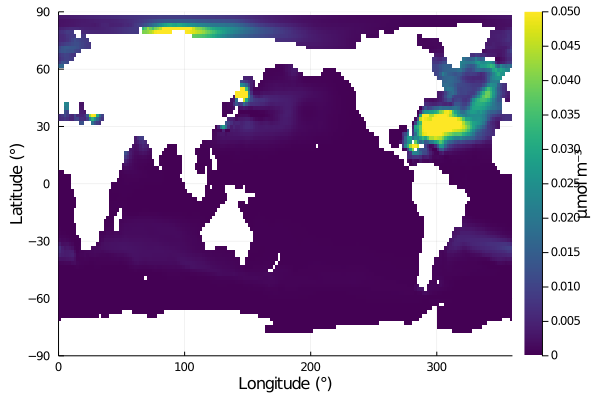

In [16]:
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,0.05))

Or we can change the timescale and watch the tracer fill the oceans:

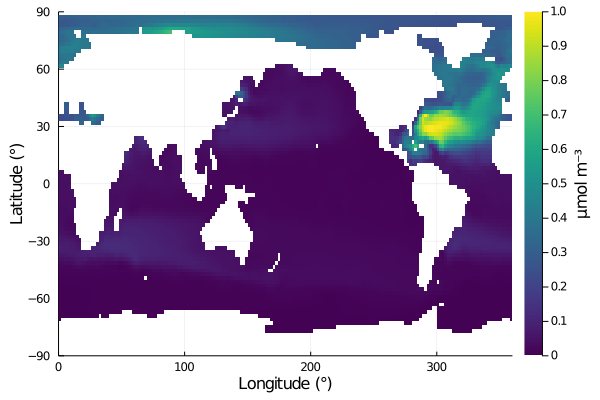

In [17]:
p = RadioRiversParameters(τ = 50.0u"yr")
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s_τ50 = solve(prob, CTKAlg()).u * u"mol/m^3"
plothorizontalslice(s_τ50, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,1))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*